# <center>Определение уязвимых групп населения

## <center>Итоговый проект первого года обучения Skillfactory Data Science

## <center>Часть 3. Анализ результатов кластеризации

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.proportion import proportions_chisquare
import scipy.stats as stats

import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

#### 3.1. Анализ и описание кластеров 

Датасет представляет из себя срез усредненных значений экономических и демографических показателей за 2016-2021 г., по которому на момент разработки данного проекта государственными органами предоставлена наиболее полная статистика.
Описание датасета:
| Признак | Описание |
| - | - |
| per_capita | среднемесячный денежный доход на человека, в рублях|
| real_incomes | средние реальные денежные доходы, в процентах к предыдущему году|
| formal_wage | среднемесячная номинальная начисленная заработная плата на человека, в рублях|
| real_pay | средняя реальная начисленная заработная плата, в процентах к предыдущему году|
| child_mortality | средняя детская смертность, в процентах от количества новорожденных|
| disabled | средняя инвалидность среди трудоспособного возраста, в процентах к населению соответствующего возраста (оценочно)|
| alco | среднее количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения|
| drug | среднее количество впервые зарегистрированных наркотических психозов на 100 тыс. населения|
| gross_regional_product | средний валовый региональный продукт (объем произведенных товаров и услуг) на душу населения, в рублях|
| living_area | средняя жилая площадь на человека|
| bad_conditions | процент респондентов, указавших на плохое состояние жилья|
| no_funds | процент респондентов, рассчитывающих на получение жилья от государства|
| general_morbidity | общая заболеваемость на 100 тыс. населения|
| congenital_malformation | средние значения врожденных пороков развития на 100 тыс. населения|
| psychosis | средние значения психических расстройств на 100 тыс. населения|
| teenage_pregnancy | усредненное значение подростковой беременности на 100 тыс. населения|
| population | среднее население, количество человек|
| reg_prod_total | усредненное значение региональных производств по всем видам деятельности на душу населения, в рублях|
| retail | усредненное значение розничной торговли на душу населения, в рублях|
| welfare | средние расходы регионального бюджета на социальную политику, в рублях на душу населения|
| crime_rate | средний уровень преступлений по годам|
| crime_growth_rate | средний темп прироста преступностей|
| serious_crimes | средний удельный вес тяжких преступлений|
| сrime_geography | средние значения коэффициентов территориального распределения преступности|
| life_expectancy | ожидаемая продолжительность жизни в 55 лет без инвалидности, год|
| employment_rate | уровень занятости пожилых, %|
| busy_retired | занятые в неформальном секторе экономики, %|
| below_the_subsistence_level | пожилые люди с доходами ниже прожиточного минимума, %|
| poor_elderly | бедные по самооценке пожилые люди, %|
| coverage_of_the_elderly | охват пожилых социальным обслуживанием, чел./100000|
| leisure_attendance | посещаемость пожилыми досуговых мероприятий, %|
| children_%  | средний процент детей среди всего населения, % от общей численности населения|
| poor_children | среднее количество детей среди малообеспеченного населения, чел.|
| poor_retired | среднее количество пенсионеров среди малообеспеченного населения, чел.|
| poor_employable | среднее количество людей трудоспособного возраста среди малообеспеченного населения, чел.|

In [2]:
df = pd.read_csv('outliers/data_labels.csv', index_col='region')
df.head(3)

,per_capita,real_incomes,formal_wage,real_pay,child_mortality,disabled,alco,drug,gross_regional_product,living_area,...,busy_retired,below_the_subsistence_level,poor_elderly,coverage_of_the_elderly,leisure_attendance,children_%,poor_children,poor_employable,poor_retired,cluster
region,,,,,,,,,,,,,,,,,,,,,
Чеченская Республика,23330.5,99.1,25364.0,88.2,369.0,135625.3,3.55,0.70,124347.6,19.2,...,64.05,29.00,19.35,11993.0,37.35,42,92204,105708,13082,2
Республика Ингушетия,16064.2,98.2,24857.3,85.1,122.6,42026.5,0.10,1.95,114423.7,27.8,...,54.65,21.70,9.00,2068.0,46.00,37,85286,114835,23728,2
Кабардино-Балкарская Республика,20569.7,98.8,24720.2,88.3,130.3,30001.3,52.85,10.30,158583.5,18.9,...,65.60,19.35,22.60,10817.5,39.70,25,91434,146193,17064,2


In [3]:
# Функция для визуализации профиля кластеров в виде полярной диаграммы
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()
    fig.write_html("outliers/plot_cluster_profile.html")

In [4]:
# группируем по кластерам
grouped_df = df.groupby('cluster').mean()
display(grouped_df)

,per_capita,real_incomes,formal_wage,real_pay,child_mortality,disabled,alco,drug,gross_regional_product,living_area,...,employment_rate,busy_retired,below_the_subsistence_level,poor_elderly,coverage_of_the_elderly,leisure_attendance,children_%,poor_children,poor_employable,poor_retired
cluster,,,,,,,,,,,,,,,,,,,,,
0,24756.820000,97.984000,31241.452000,90.436000,152.576000,33480.928000,70.668000,9.924000,3.065422e+05,17.164000,...,18.108000,19.994000,3.338000,20.570000,6046.840000,35.772000,18.720000,104568.160000,161170.000000,12346.120000
1,31762.909524,98.366667,37804.509524,90.942857,456.052381,108456.400000,46.266666,12.350000,4.364276e+05,16.847619,...,20.411905,20.250000,3.209524,19.752381,13147.047619,38.228571,20.619048,279330.571429,380703.761905,41269.761905
2,22034.140000,99.360000,29631.940000,89.770000,132.780000,38041.790000,40.340001,6.570000,2.536651e+05,18.910000,...,22.480000,35.035000,11.945000,13.860000,7108.100000,40.790000,27.600000,70300.000000,116735.200000,17091.600000
3,25305.475000,99.181250,30131.931250,79.487500,107.487500,32852.506250,66.581250,12.003125,2.966941e+05,17.162500,...,19.609375,23.893750,2.943750,14.571875,11949.468750,34.450000,18.562500,79409.937500,112555.625000,14608.250000
4,49799.784615,99.730769,65166.776923,93.161538,111.038462,17545.992308,109.876923,9.465384,1.465808e+06,16.269231,...,29.726923,13.165385,2.565385,13.646154,7708.769231,42.638462,20.538462,56357.461538,82625.692308,9882.692308


In [5]:
# строим полярную диаграмму
plot_cluster_profile(grouped_df, 5)

In [6]:
df['cluster'].value_counts().sort_index()

cluster
0    25
1    21
2    10
3    16
4    13
Name: count, dtype: int64

In [7]:
df[df['cluster'] == 0].index

Index(['Забайкальский край', 'Республика Бурятия', 'Республика Хакасия',
       'Калининградская область', 'Смоленская область', 'Тверская область',
       'Псковская область', 'Курганская область', 'Новгородская область',
       'Кировская область', 'Ивановская область', 'Амурская область',
       'Волгоградская область', 'Ульяновская область', 'Томская область',
       'Вологодская область', 'Оренбургская область', 'Республика Марий Эл',
       'Удмуртская Республика', 'Чувашская Республика',
       'Архангельская область без Ненецкого АО', 'Орловская область',
       'Рязанская область', 'Владимирская область', 'Воронежская область'],
      dtype='object', name='region')

Рассмотрим некоторые признаки в кластерах:

**0 кластер** - регионы с низкоразвитой промышленностью, с высоким уровнем преступности (*crime_rate*) со средним уровнем розничной торговли (*retail*), с низким уровнем региональных производств по всем видам деятельности (*reg_prod_total*) и валого регионального продукта (*gross_regional_product*). Вторые по показателю бедные по самооценке пожилые люди (*poor_elderly*). Сердние показатели по стране по общей заболеваемости (*general_morbidity*) и психических расстройств (*psychosis*). Учитывая небольшую численность населения, территории можно отнести к бедным, судя по абсолютным значениям людей трудоспособного возраста и детей среди малообеспеченного населения. Территории с более высоким уровнем преступлений. Для регионов характерны более высокие показатели расходов регионального бюджета на социальную политику (*welfare*), как в кластере 4. В кластер включены 25 субъекта РФ. Назовем дотационными регионами.


In [8]:
df[df['cluster'] == 1].index

Index(['Республика Дагестан', 'Красноярский край', 'Иркутская область',
       'Омская область', 'Пермский край', 'Ростовская область',
       'Новосибирская область', 'Ставропольский край', 'Краснодарский край',
       'Саратовская область', 'Нижегородская область', 'Кемеровская область',
       'Приморский край', 'Самарская область', 'Московская область',
       'Свердловская область', 'Республика Башкортостан',
       'Республика Татарстан', 'Челябинская область', 'Москва',
       'Санкт-Петербург'],
      dtype='object', name='region')

**1 кластер** - регионы с самыми высокими абсолютными значениями детей, пенсионеров и людей трудоспособного возраста среди малообеспеченного населения (*poor_children*, *poor_retired*, *poor_employable*), и количеством впервые зарегистрированных наркотических психозов (*drug*). Данные регионы можно отнести к регионам с весьма средними расходами регионального бюджета на социальную политику (*welfare*). Регионы нельзя отнести к бедным, поскольку они определяют территории с большой численностью населения, а представленные значения малообеспеченного населения даны в абсолютных единицах.
Для кластера характерна высокая детская смертность (*child_mortality*), вторые - по доходам населения (*per_capita*) и средней реальной начисленной заработной платой (*real_pay*), с малыми темпами роста преступности, но с самыми высокими показателями тяжких и собо тяжких преступлений (*serious_crimes*). Регионы можно отнести к промышленно развитым, лидеры по уровню розничной торговли и вторые - по валовому региональному продукту. Для регионов характерны средние показатели общей заболеваемости (*general_morbidity*), наличия психически расстройств (*psychosis*) и врожденных пороков (*congenital_malformation*).
В кластер включены 21 субъект РФ. Назовем их развитые регионы.

In [9]:
df[df['cluster'] == 2].index

Index(['Чеченская Республика', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика', 'Республика Тыва',
       'Карачаево-Черкесская Республика', 'Республика Северная Осетия-Алания',
       'Республика Адыгея', 'Тюменская область без округов',
       'Республика Калмыкия', 'Ленинградская область'],
      dtype='object', name='region')

**2 кластер** - регионы с высокими темпами преступлений (*crime_growth_rate*), высокими расходами регионального бюджета на социальную политику (*welfare*), с высокими процентами детей (*children*), но низким уровнем детской смертности (*child_mortality*). Второе место по уровне заболеваемости (*congenital_malformation*) и числу людей, рассчитывающих на получение жилья от государства (*no_funds*). Регионы с малыми производственными показателями по валовому региональному продукту (*gross_regional_product*), значениями региональных производств по всем видам деятельности на душу населения (*reg_prod_total*) и показателями розничной торговли (*retail*). Это территории с небольшой численностью населения, с невысоками доходами населения (*per_capita*), лидеры по занятости пенсионеров в неформальном секторе экономики (*busy_retired*). В кластер включены 10 субъектов РФ. Назовем их бедными регионами.

In [10]:
df[df['cluster'] == 3].index

Index(['Еврейская автономная область', 'Республика Алтай',
       'Пензенская область', 'Калужская область', 'Республика Крым',
       'Астраханская область', 'Севастополь', 'Белгородская область',
       'Курская область', 'Ярославская область', 'Республика Мордовия',
       'Липецкая область', 'Брянская область', 'Тамбовская область',
       'Костромская область', 'Тульская область'],
      dtype='object', name='region')


**3 кластер** - регионы с самыми высокими значениями подростковой беременности (*teenage_pregnancy*), средние по показателям реальных денежных доходов по отношению к предыдущему году (*real_incomes*), уровня преступности (*crime_rate*), темпа прироста преступностей (*crime_growth_rate*), расходов регионального бюджета на социальную политику (*welfare*). Более высокие уровни розничной торговли (*retail*), региональных производств по всем видам деятельности (*reg_prod_total*), чем в кластере 2.  Для кластера характерны низкие показатели детской смертности (*child_mortality*) и инвалидности среди трудоспособного возраста (*disabled*). Более высокие показатели охвата пожилых социальным обслуживанием (*coverage_of_the_elderly*) с небольшим населением.
В кластер включены 16 субъектов РФ. Это среднестатистические регионы.

In [11]:
df[df['cluster'] == 4].index

Index(['Республика Саха (Якутия)', 'Республика Карелия',
       'Ненецкий автономный округ', 'Республика Коми', 'Алтайский край',
       'Хабаровский край', 'Мурманская область',
       'Ханты-Мансийский автономный округ - Югра', 'Сахалинская область',
       'Ямало-Ненецкий автономный округ', 'Магаданская область',
       'Чукотский автономный округ', 'Камчатский край'],
      dtype='object', name='region')

**4 кластер** - регионы - лидеры по уровню зарплат, с самыми высокими показателями валового регионального продукта (*gross_regional_product*), с большим объемом розничной торговли на душу населения (*retail*), с самыми высокими показателями уровня занятости пожилых (*employment_rate*), с высокими показателями заболеваемости (*general_morbidity*), врожденных пороков развития (*congenital_malformation*), психических расстройств (*psychosis*), вследствие чего наблюдается высокое количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения (*algo*). Для регионов характерны самые низкие расходы регионального бюджета на социальную политику (*welfare*), большим количеством граждан, рассчитывающих на получение жилья от государства (*no_funds*), плохими жилищными условиями (*bad_conditions*) и низкими показателями жилой площади (*living_area*). Территории с низкой численностью населения и плохой рождаемостью.
В кластер включены 13 субъектов РФ. Назовем условно регионами Севера. 

#### 3.2. Проверка статистических гипотез

Рассмотрим статистическую значимость наблюдаемых различий. Как было показано в части 2 проекта, распределения признаков, за исключением  среднего количества детей среди малообеспеченного населения (*poor_ children*), людей трудоспособного возраста среди малообеспеченного населения (*poor_employable*), среднего уровня преступлений (*crime_rate*), среднего темпа прироста преступностей (*crime_growth_rate*), ожидаемой продолжительностью жизни в 55 лет без инвалидности (*life_expectancy*), бедных по самооценке пожилые люди (*poor_elderly*) и посещаемостью пожилыми досуговых мероприятий (*leisure_attendance*), не являются нормальными, а количество сравниваемых групп больше двух. В этом случае можно применить непараметрический критерий Краскела-Уоллиса.


Для признаков число детей среди малообеспеченного населения (*the_poor: children*), людей трудоспособного возраста среди малообеспеченного населения (*the_poor: employable*), уровня преступлений (*crime_rate*), темпа прироста преступностей (*crime_growth_rate*), ожидаемой продолжительности жизни в 55 лет без инвалидности (*life_expectancy*), бедных по самооценке пожилых людей (*poor_elderly*) и посещаемость пожилыми досуговых мероприятий (*leisure_attendance*) будем использовать тест ANOVA. 

In [12]:
def ANOVA_results(df, col):
    """Функция для вычисления статистик дисперсионного анализа ANOVA.

    Args:
        df (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        col (str): наименование признаков
    
    Returns:   
        p (float): p-value для заданной колонки (значимость различий по пяти кластерам)
    """
    v0 = df[df['cluster'] == 0][col]
    v1 = df[df['cluster'] == 1][col]
    v2 = df[df['cluster'] == 2][col]
    v3 = df[df['cluster'] == 3][col]
    v4 = df[df['cluster'] == 4][col]
    
    # задаём уровень значимости
    alpha = 0.05
    print('\nТест на равенство дисперсий')
    result = stats.levene(v0, v1, v2, v3, v4)
    print('p-value = {:.3f}'.format(result[1]))
    # интерпретируем результат
    if result[1] <= alpha:
        print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
    else:
        print('Дисперсии одинаковы, мы можем использовать тест ANOVA')
    
    print('Тест на равенство средних')
    _, p = stats.f_oneway(v0, v1, v2, v3, v4)
    print('p-value = {:.3f}'.format(p))
    # интерпретируем результат
    
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    return p

cols_norm = ['poor_children', 'poor_employable', 'crime_rate', 'crime_growth_rate', 
             'life_expectancy', 'poor_elderly', 'leisure_attendance']
for col in cols_norm:
    print(f'{col}:   p-value = {ANOVA_results(df, col):.3f}')



Тест на равенство дисперсий
p-value = 0.017
Дисперсии не одинаковы, нужно использовать непараметрический тест
Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
poor_children:   p-value = 0.000

Тест на равенство дисперсий
p-value = 0.060
Дисперсии одинаковы, мы можем использовать тест ANOVA
Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
poor_employable:   p-value = 0.000

Тест на равенство дисперсий
p-value = 0.405
Дисперсии одинаковы, мы можем использовать тест ANOVA
Тест на равенство средних
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
crime_rate:   p-value = 0.002

Тест на равенство дисперсий
p-value = 0.218
Дисперсии одинаковы, мы можем использовать тест ANOVA
Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нуле

In [13]:
def kruskal_pvalue(df, col):
    """Функция для вычисления статистик Крускалла-Уоллиса.

    Args:
        df (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        col (str): наименование признаков
    Returns:   
        p (float): p-value для заданной колонки (значимость различий по пяти кластерам)
    """
    v0 = df[df['cluster'] == 0][col]
    v1 = df[df['cluster'] == 1][col]
    v2 = df[df['cluster'] == 2][col]
    v3 = df[df['cluster'] == 3][col]
    v4 = df[df['cluster'] == 4][col]
    _, p = kruskal(v0, v1, v2, v3, v4)
    return p

# задаём уровень значимости
alpha = 0.05 
# список признаков, распределение значений которых не соответствует нормальному распределению
cols = [x for x in df.columns if ((x != 'the_poor: children') & (x != 'the_poor: employable') & (x != 'crime_rate') &\
                                 (x != 'crime_growth_rate') & (x != 'life_expectancy') & (x != 'poor_elderly') & (x != 'leisure_attendance'))]

for col in cols:
    print(f'{col}:   p-value = {kruskal_pvalue(df, col):.3f}')
    if kruskal_pvalue(df, col) <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.3f}. Отвергаем нулевую гипотезу.\n'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.3f}. У нас нет оснований отвергнуть нулевую гипотезу.\n'.format(alpha))

per_capita:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.

real_incomes:   p-value = 0.011
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.

formal_wage:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.

real_pay:   p-value = 0.051
p-значение больше, чем заданный уровень значимости 0.050. У нас нет оснований отвергнуть нулевую гипотезу.

child_mortality:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.

disabled:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.

alco:   p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.

drug:   p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.050. У нас нет оснований отвергнуть нулевую гипотезу.

gross_regional_product:   p-va

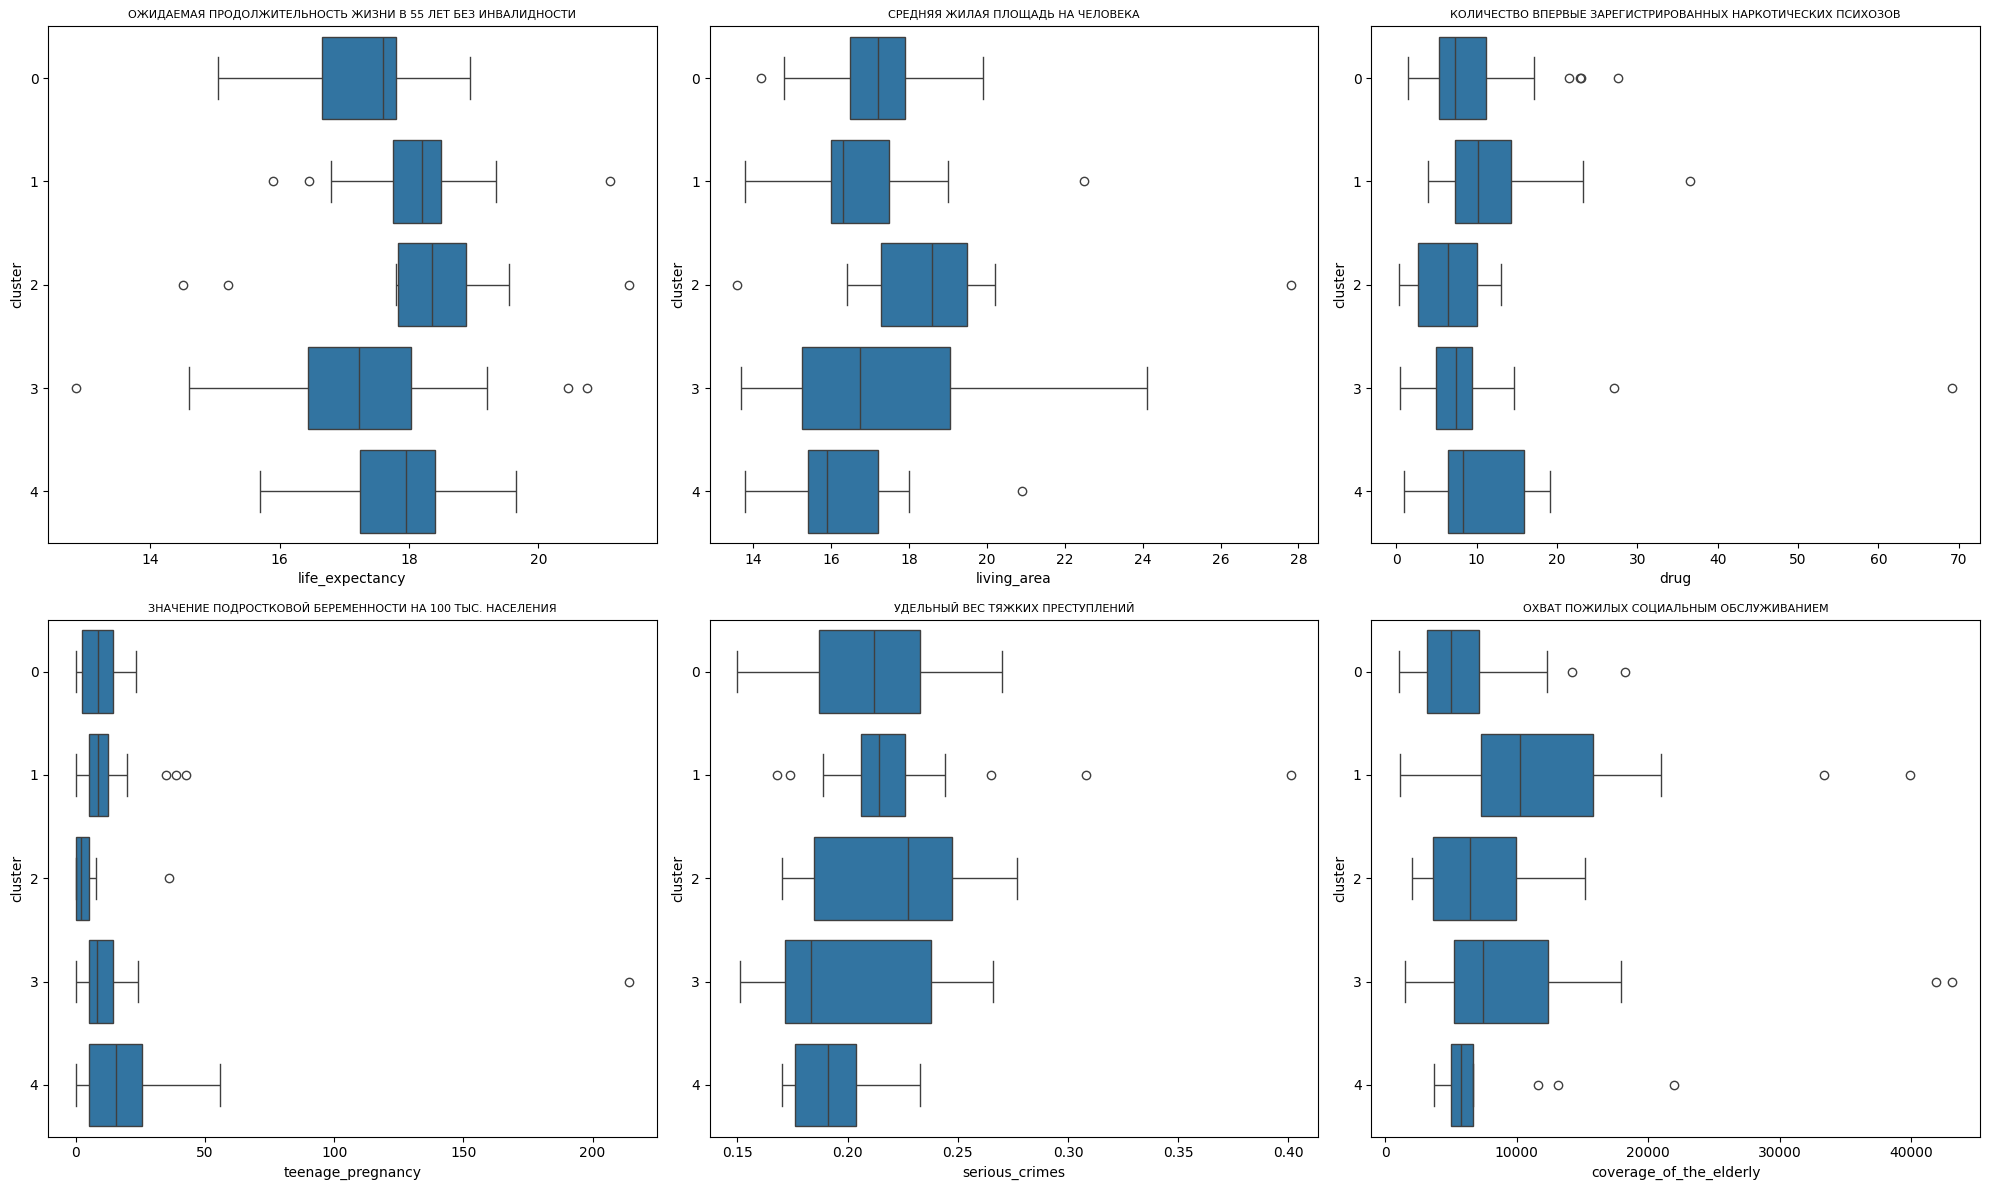

In [14]:
# построим столбчатые диаграмы признаков, в которых отсутствуют значимые различия в кластерах 
title=['ожидаемая продолжительность жизни в 55 лет без инвалидности',
       'средняя жилая площадь на человека',
       'количество впервые зарегистрированных наркотических психозов',
       'значение подростковой беременности на 100 тыс. населения',
       'удельный вес тяжких преступлений',
       'охват пожилых социальным обслуживанием'
    ]

cols_H0 = df[
    ['life_expectancy',
     'living_area',
     'drug',
     'teenage_pregnancy',
     'serious_crimes',
     'coverage_of_the_elderly'
    ]
].columns.tolist()
plt.figure(figsize=(20, 12))

for i, variable in enumerate(cols_H0):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x= df[variable], y=df['cluster'], orient='h')
    plt.tight_layout()
    plt.title(title[i].upper(), fontsize = 8)
plt.show()

##### Промежуточные выводы:
На основании проверки статистических гипотез о равенстве статистических показателей 35 признаков в 5 кластерах, было установлено, что с вероятностью 0,95 можно утверждать:
1) ожидаемая продолжительность жизни в 55 лет без инвалидности (*life_expectancy*), средняя жилая площадь на человека (*living_area*),  количество впервые зарегистрированных наркотических психозов (*drug*), значение подростковой беременности на 100 тыс. населения (*teenage_pregnancy*), средний удельный вес тяжких преступлений (*serious_crimes*) и охват пожилых социальным обслуживанием (*coverage_of_the_elderly*) значимо не различаются во всех кластерах. Принимается нулевая гипотеза Н0; Таким образом, можно с вероятностью 0,95 утверждать, что эти признаки во всех кластерах значимо не различаются и их можно в дальнейшем не рассматривать;
2) числовые характеристики остальных признаков датасета значимо различаются во всех кластерах, принимается альтернативная гипотеза Н1.

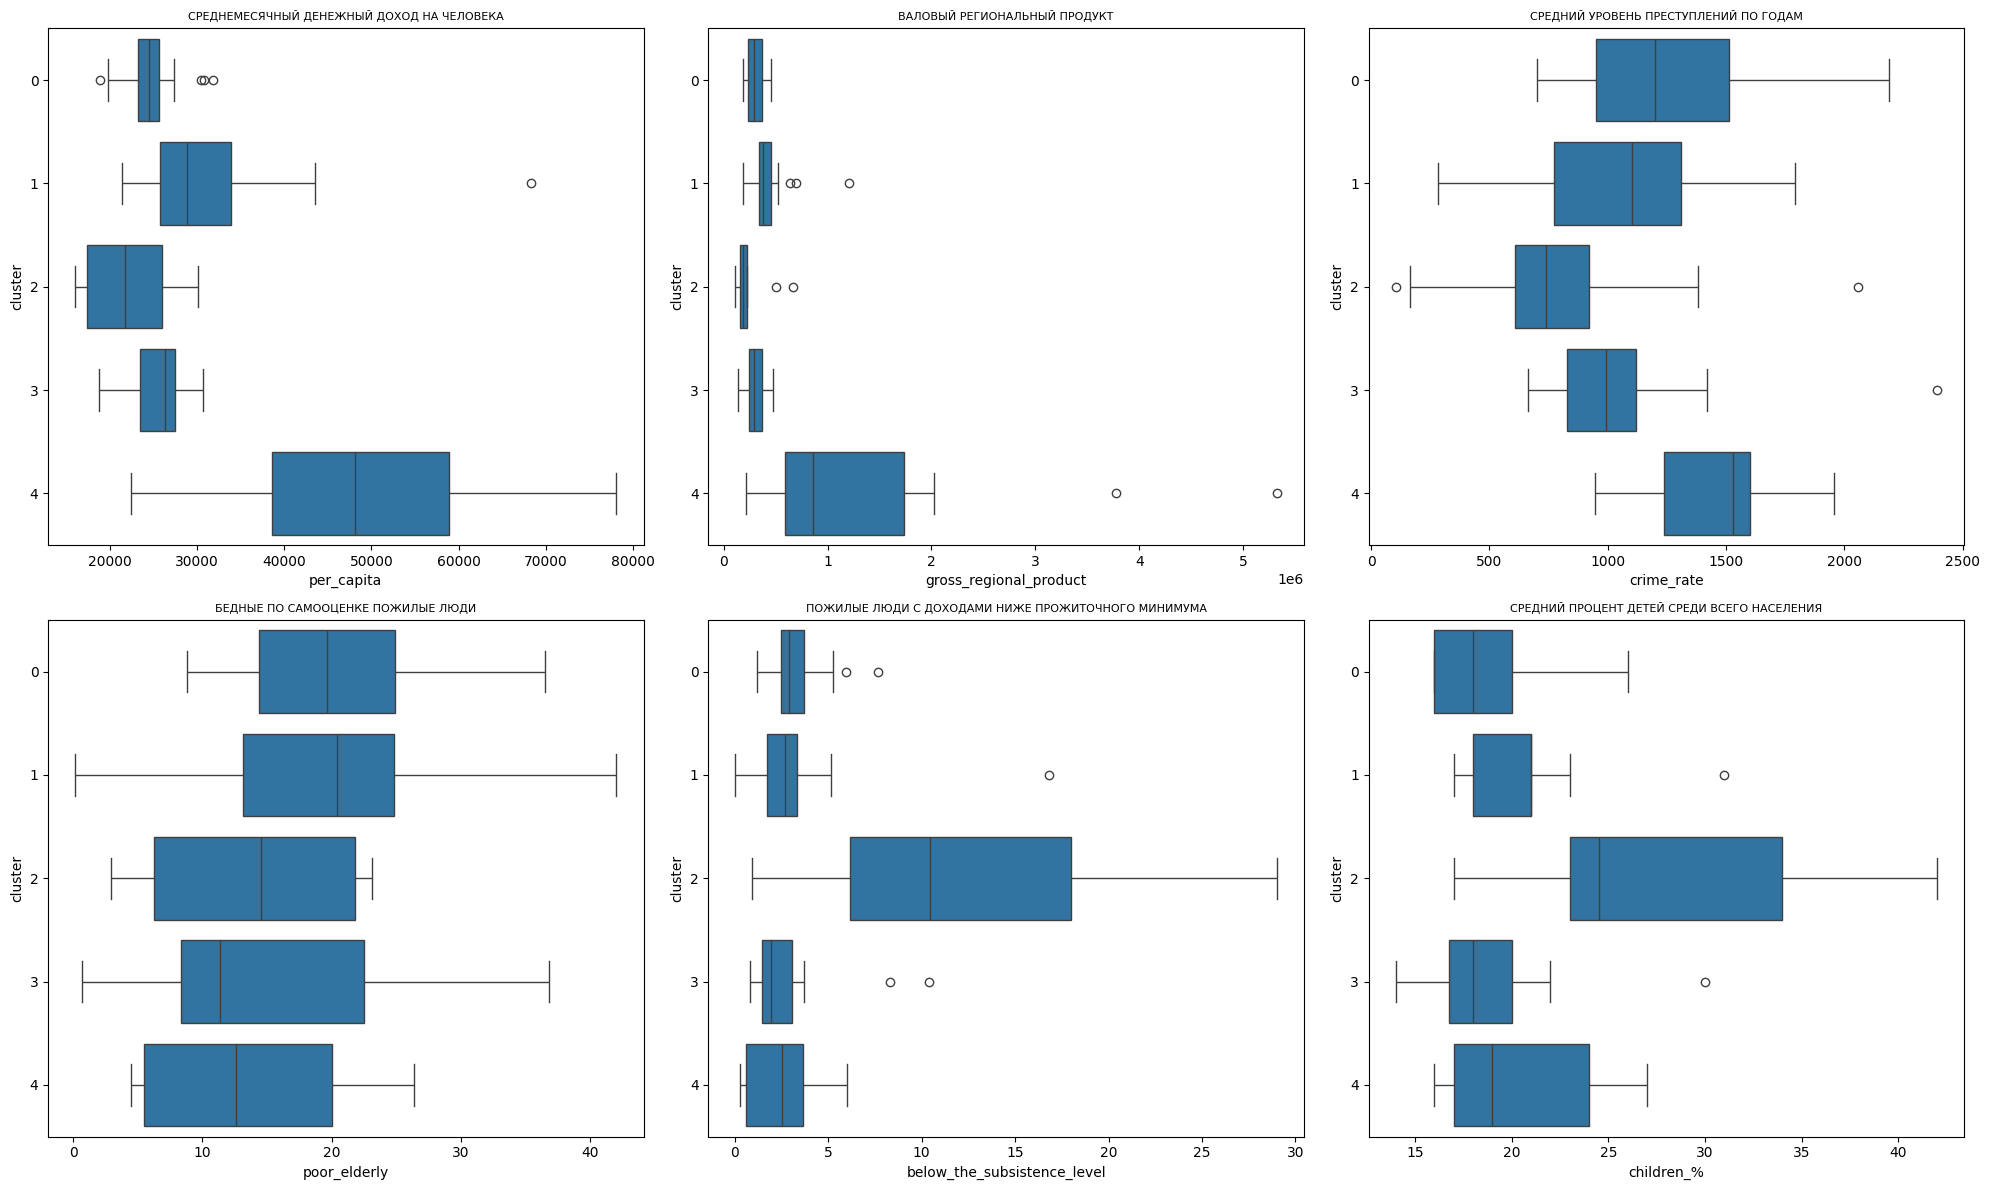

In [15]:
# построим столбчатые диаграмы признаков 
title=['среднемесячный денежный доход на человека',
       'валовый региональный продукт',
       'средний уровень преступлений по годам',
       'бедные по самооценке пожилые люди',
       'пожилые люди с доходами ниже прожиточного минимума',
       'средний процент детей среди всего населения'
    ]

cols = df[
    ['per_capita',
     'gross_regional_product',
     'crime_rate',
     'poor_elderly', 
     'below_the_subsistence_level',
     'children_%'
    ]
].columns.tolist()
plt.figure(figsize=(20, 12))

for i, variable in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x= df[variable], y=df['cluster'], orient='h')
    plt.tight_layout()
    plt.title(title[i].upper(), fontsize = 8)
plt.show()


In [16]:
grouped_df = df.groupby('cluster')[['per_capita', 'gross_regional_product', 'crime_rate', 'disabled', 'welfare',
                                   'poor_elderly', 'below_the_subsistence_level','children_%', 'poor_children']].mean()
display(grouped_df)

,per_capita,gross_regional_product,crime_rate,disabled,welfare,poor_elderly,below_the_subsistence_level,children_%,poor_children
cluster,,,,,,,,,
0,24756.820000,3.065422e+05,1293.824000,33480.928000,21.712000,20.570000,3.338000,18.720000,104568.160000
1,31762.909524,4.364276e+05,1031.528571,108456.400000,21.204762,19.752381,3.209524,20.619048,279330.571429
2,22034.140000,2.536651e+05,818.410000,38041.790000,21.480000,13.860000,11.945000,27.600000,70300.000000
3,25305.475000,2.966941e+05,1059.293750,32852.506250,19.500000,14.571875,2.943750,18.562500,79409.937500
4,49799.784615,1.465808e+06,1453.992308,17545.992308,16.623077,13.646154,2.565385,20.538462,56357.461538


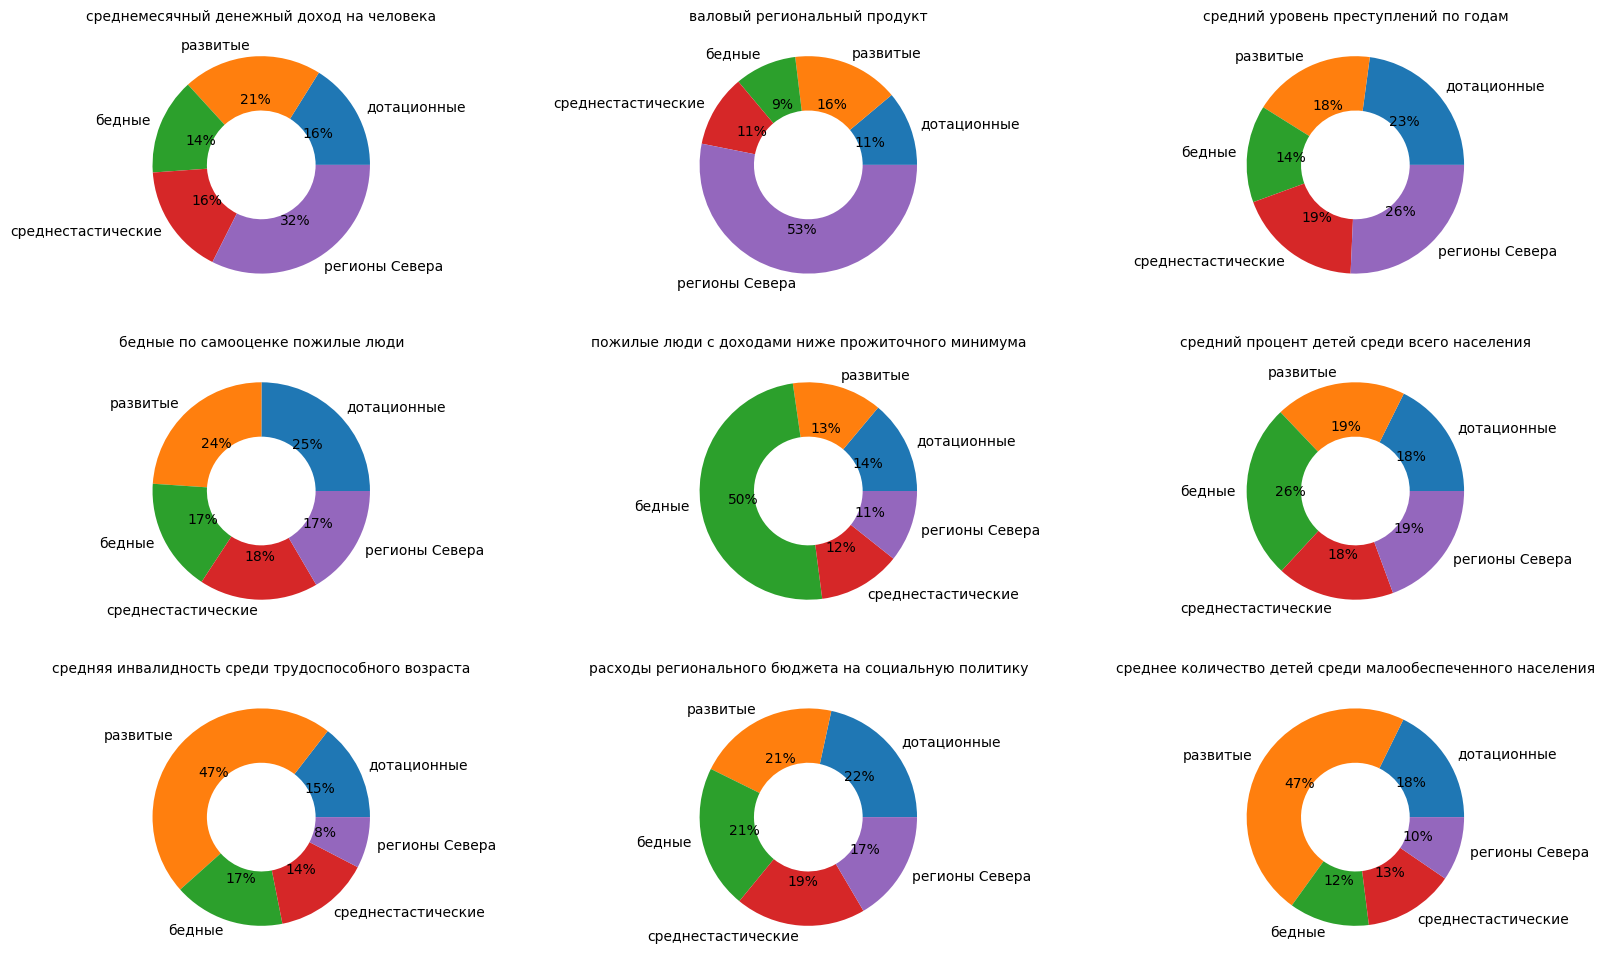

In [17]:
labels = ['дотационные', 'развитые', 'бедные', 'среднестастические', 'регионы Севера']
fig, ax = plt.subplots(3, 3, figsize=(20, 12))
ax[0][0].pie(grouped_df['per_capita'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[0][0].set_title('среднемесячный денежный доход на человека', fontsize=10)
ax[0][1].pie(grouped_df['gross_regional_product'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[0][1].set_title('валовый региональный продукт', fontsize=10)
ax[0][2].pie(grouped_df['crime_rate'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[0][2].set_title('средний уровень преступлений по годам', fontsize=10)

ax[1][0].pie(grouped_df['poor_elderly'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[1][0].set_title('бедные по самооценке пожилые люди', fontsize=10)
ax[1][1].pie(grouped_df['below_the_subsistence_level'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[1][1].set_title('пожилые люди с доходами ниже прожиточного минимума', fontsize=10)
ax[1][2].pie(grouped_df['children_%'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[1][2].set_title('средний процент детей среди всего населения', fontsize=10);

ax[2][0].pie(grouped_df['disabled'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[2][0].set_title('средняя инвалидность среди трудоспособного возраста', fontsize=10)
ax[2][1].pie(grouped_df['welfare'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[2][1].set_title('расходы регионального бюджета на социальную политику', fontsize=10)
ax[2][2].pie(grouped_df['poor_children'], labels=labels, wedgeprops=dict(width=0.5),autopct='%1.0f%%')
ax[2][2].set_title('среднее количество детей среди малообеспеченного населения', fontsize=10);

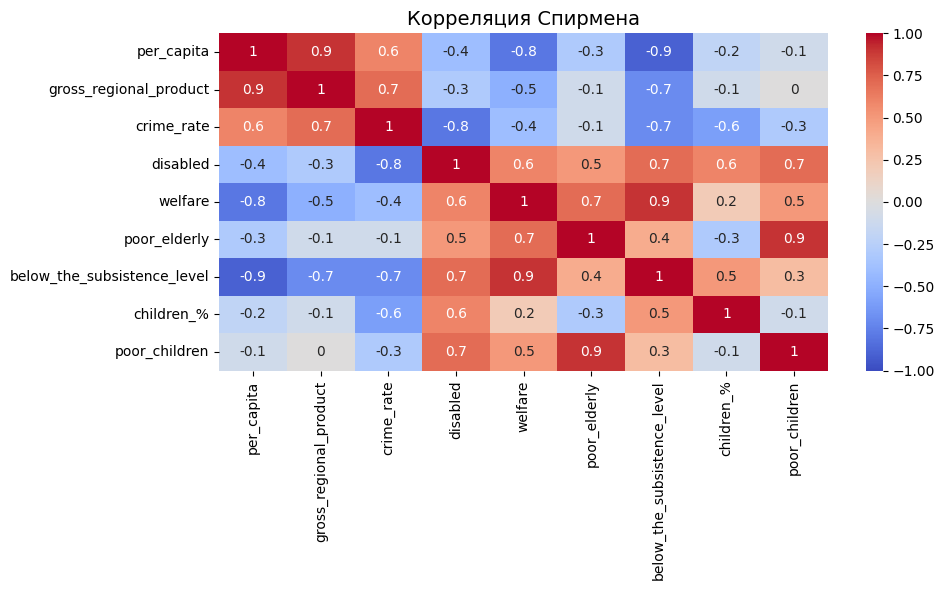

In [18]:
# Создаем новую тепловую карту
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(grouped_df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax)
ax.set_title('Корреляция Спирмена', fontsize=14)
plt.tight_layout();

##### Промежуточные выводы:
На основании проверки статистических гипотез о равенстве статистических показателей 35 признаков в 5 кластерах, было установлено, что с вероятностью 0,95 можно утверждать:
- Лидерами по среднемесячному доходу на человека и валовому региональному продукту стали "развитые" регионы (32% и 53%), "бедные" регионы имеют самые малую долю указанных признаков.

- Ожидаемо, что доля пожилых людей с доходами ниже прожиточного минимума наблюдается в "бедных" регионах (50%), однако доля бедности людей по самооценки в кластерах практически одинаково.

- В "бедных" регионах существенно ниже инвалидность (*disabled*) среди граждан трудоспособного возраста (17%), в "дотационных" (15%); в "развитых" регионах, наоборот, демонстрируют самый высокий процент (47%). Одним из объяснений, по-моему мнению, в развитых регионах большие возможность трудоустройства такой категории людей, этим же можно объяснить тот факт, что эти регионы входят в тройку по проценту общей заболеваемости. Различие в статистических группах показала принятие альтернативной гипотезы о значимом различии показателя в кластерах при уровне значимости 0,05.

- Расходы региональных бюджетов на социальную политику (*welfare*) и средний уровень преступлений по годам во всех кластерах малоразличимы и находятся практически в равных долях. Лидерами стали "дотационные" регионы (22%) по расходам на социальную политику, регионы "Севера" - по уровню преступлений (26%).

- Наибольшее количество детей среди малообеспеченного населения и средняя инвалидность среди трудоспособного возраста - в развитых регионах, в дальнейшем уточним признаки с точки зрения процентного соотношения. 

In [19]:
def kruskal_pvalue(df, col):
    "p-value для заданной колонки (значимость различий по трем наиболее отстающим кластерам)"

    v0 = df[df['cluster'] == 0][col]
    v2 = df[df['cluster'] == 2][col]
    _, p = kruskal(v0, v2)
    return p


cols = ['per_capita', 'gross_regional_product', 'crime_rate', 'poor_elderly', 'below_the_subsistence_level', 'children_%']
for col in cols:
    print(f'{col}:   p-value = {kruskal_pvalue(df, col):.3f}')

per_capita:   p-value = 0.086
gross_regional_product:   p-value = 0.012
crime_rate:   p-value = 0.007
poor_elderly:   p-value = 0.063
below_the_subsistence_level:   p-value = 0.008
children_%:   p-value = 0.000


#### 3.3 Анализ показателей бедности в регионах

##### 3.3.1. Группы населения, сталкивающиеся с бедностью

In [20]:
# Процент бедных среди малообеспеченного населения
df['poor'] = df['poor_retired']+ df['poor_children']+ df['poor_employable']
# Процент бедных среди малообеспеченного населения
df['poor_%'] = (df['poor_children']+df['poor_retired']+df['poor_employable'])*100/df['population']

df['poor_retired_%'] = df['poor_retired']*100/df['population']
df['poor_employable_%'] = df['poor_employable']*100/df['population']
df['poor_children_%'] = df['poor_children']*100/df['population']

In [21]:
cols =['poor_children_%', 'poor_employable_%', 'poor_retired_%', 'poor_%']
poor_percent = pd.concat([df['poor_retired_%'], df['poor_employable_%'], df['poor_children_%'], df['cluster']], axis = 1)

In [22]:
print(df.groupby('cluster')[['population']].mean())

           population
cluster              
0        1.209461e+06
1        3.865275e+06
2        7.934667e+05
3        1.051580e+06
4        7.957935e+05


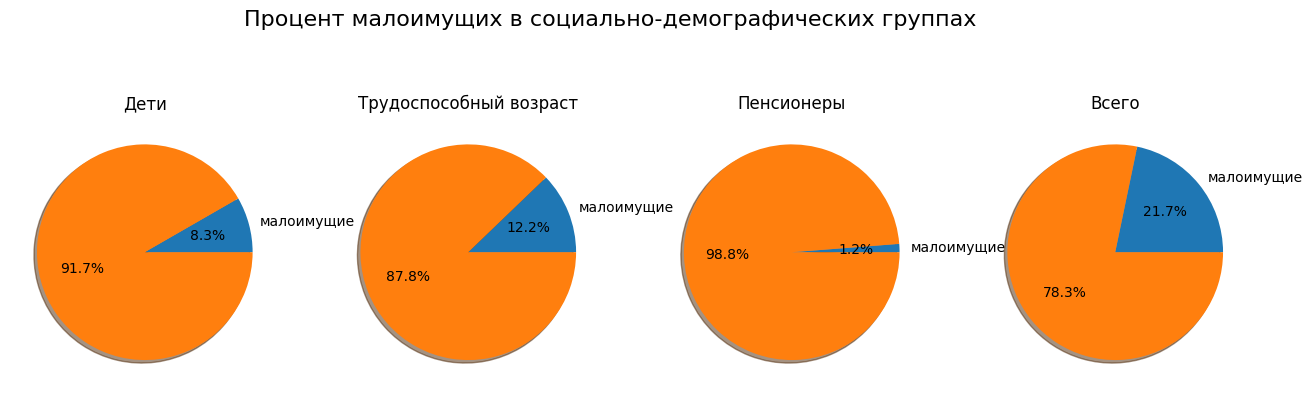

In [23]:
labels = ['малоимущие', '']
fig, ax = plt.subplots(1, 4, figsize=(16,5))
ax[0].pie([df[cols].mean()[0], (100-df[cols].mean())[0]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].pie([df[cols].mean()[1], (100-df[cols].mean())[1]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[2].pie([df[cols].mean()[2], (100-df[cols].mean())[2]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[3].pie([df[cols].mean()[3], (100-df[cols].mean())[3]], 
          labels=labels, autopct='%1.1f%%', shadow=True);
ax[0].set_title('Дети')
ax[1].set_title('Трудоспособный возраст')
ax[2].set_title('Пенсионеры')
ax[3].set_title('Всего')
fig.suptitle('Процент малоимущих в социально-демографических группах', fontsize=16)
fig.set_facecolor('white');

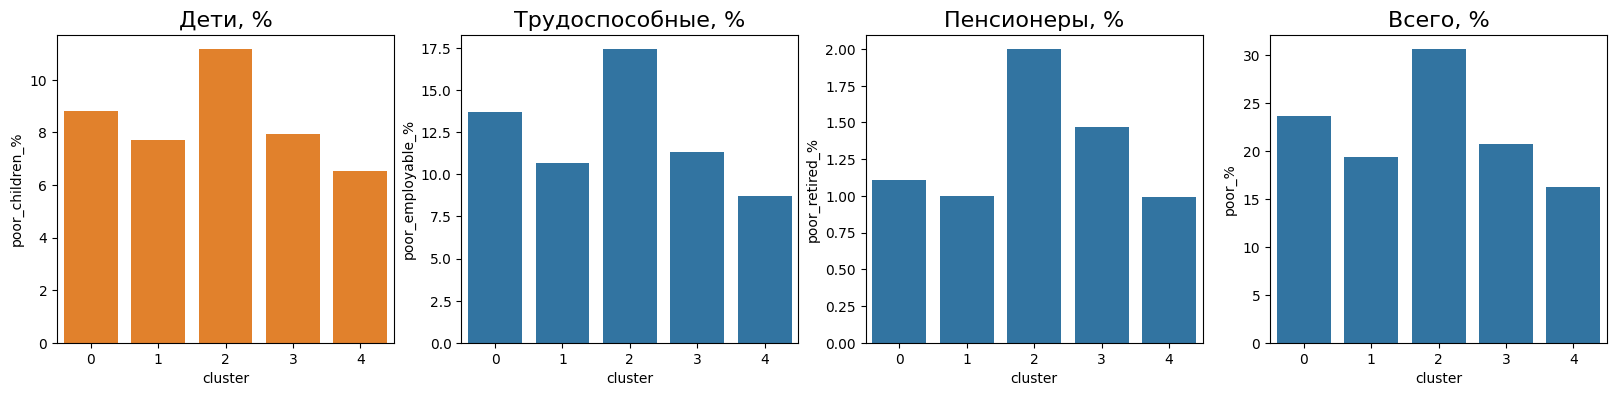

In [24]:
poor_percent = (df.groupby('cluster')[['poor_children_%', 'poor_employable_%', 'poor_retired_%', 'poor_%']].mean())
fig, ax  = plt.subplots(1, 4, figsize=(20, 4))
ax[0].bar(poor_percent.index, poor_percent['poor_children_%'])
sns.barplot(data=poor_percent, 
            x=poor_percent.index, y='poor_children_%', ax=ax[0])
sns.barplot(data=poor_percent, 
            x=poor_percent.index, y='poor_employable_%', ax=ax[1])
sns.barplot(data=poor_percent, 
            x=poor_percent.index, y='poor_retired_%', ax=ax[2])
sns.barplot(data=poor_percent, 
            x=poor_percent.index, y='poor_%', ax=ax[3])
ax[0].set_title('Дети, %', fontsize=16)
ax[1].set_title('Трудоспособные, %', fontsize=16)
ax[2].set_title('Пенсионеры, %', fontsize=16)
ax[3].set_title('Всего, %', fontsize=16);


In [25]:
def poor_kruskal_pvalue(df, col):
    "p-value для заданной колонки (значимость различий по всем кластерам)"

    v0 = df[df['cluster'] == 0][col]
    v1 = df[df['cluster'] == 1][col]
    v2 = df[df['cluster'] == 2][col]
    v3 = df[df['cluster'] == 3][col]
    v4 = df[df['cluster'] == 4][col]
    _, p = kruskal(v0, v1,v2, v3, v4)
    return p


cols = ['poor_children_%', 'poor_employable_%', 'poor_retired_%']
for col in cols:
    print(f'{col}:   p-value = {poor_kruskal_pvalue(df, col):.3f}')

poor_children_%:   p-value = 0.032
poor_employable_%:   p-value = 0.000
poor_retired_%:   p-value = 0.154


#### Промежуточные выводы:
1. Определены проценты малоимущих (бедных) среди детей, пенсионеров и людей трудоспособного возраста, показано, что имеются значимые различия среди малообеспеченных детей и малообеспеченных людей трудоспособносного возраста в пяти кластерах.
2. В "бедных" регионах наблюдаем наибольший процент малообеспеченных среди детей и людей трудоспособного возраста, также в лидерах "дотационные" регионы. Аналогичная картина наблюдается с малобеспеченными пенсионерами, однако подтверждается гипотеза об отсутствии значимого различия в кластерах на основании критерия Крускала-Уоллиса.

#### 3.3.2. Анализ бедности по двум наиболее отстающим кластерам ("дотационные" (0) и "бедные" (2))

Сравнение данных по двум кластерам будем осуществлять по критерию Манна-Уитни для двух независимых выборок.

In [26]:
cols = ['poor_children_%', 'poor_employable_%', 'poor_retired_%']
for col in cols:
    v0 = df[df['cluster'] == 0][col]
    v2 = df[df['cluster'] == 2][col]
    statistic, pvalue = mannwhitneyu(v0, v2)

    print(f'Mann-Whitney U test: U = {int(statistic)}, p = {pvalue:6.4f}')



Mann-Whitney U test: U = 96, p = 0.2980
Mann-Whitney U test: U = 89, p = 0.1949
Mann-Whitney U test: U = 71, p = 0.0508


Mann-Whitney U test: U = 200, p = 0.0065
Mann-Whitney U test: U = 220, p = 0.0006


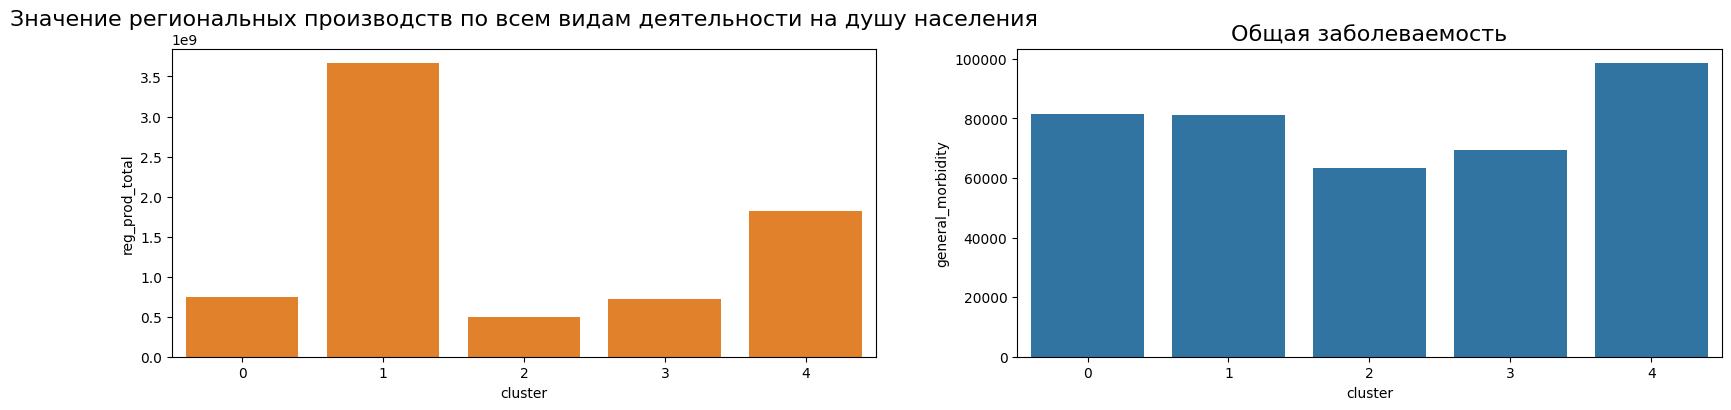

In [27]:
cols = ['reg_prod_total','general_morbidity']
for col in cols:
    v0 = df[df['cluster'] == 0][col]
    v2 = df[df['cluster'] == 2][col]
    statistic, pvalue = mannwhitneyu(v0, v2)

    print(f'Mann-Whitney U test: U = {int(statistic)}, p = {pvalue:6.4f}')


total = (df.groupby('cluster')[['reg_prod_total','general_morbidity']].mean())
fig, ax  = plt.subplots(1,2, figsize=(20, 4))

ax[0].bar(total.index, total['reg_prod_total'])
sns.barplot(data=total, 
            x=total.index, y='reg_prod_total', ax=ax[0])
sns.barplot(data=total, 
            x=total.index, y='general_morbidity', ax=ax[1])

ax[0].set_title('Значение региональных производств по всем видам деятельности на душу населения', fontsize=16);
ax[1].set_title('Общая заболеваемость', fontsize=16);

In [28]:
col = 'poor_retired_%'  # колонка
cluster = 4          # кластер

mask = df['cluster'] == cluster
df[mask][col].sort_values(ascending=False)

region
Алтайский край                              2.668012
Сахалинская область                         2.286879
Магаданская область                         2.058450
Хабаровский край                            1.228803
Камчатский край                             1.186025
Республика Саха (Якутия)                    1.106699
Республика Коми                             1.102165
Республика Карелия                          0.528005
Чукотский автономный округ                  0.321433
Ненецкий автономный округ                   0.183169
Ханты-Мансийский автономный округ - Югра    0.124832
Мурманская область                          0.063199
Ямало-Ненецкий автономный округ             0.040516
Name: poor_retired_%, dtype: float64

In [29]:
# сохраним модель в виде pickle-файла
with open('data/model_3.pkl', 'wb') as pkl_file:
    pickle.dump(df, pkl_file)

#### Выводы по части 3: 
В результе кластеризации были выделены 5 кластеров:

**0 кластер** - "дотационные" регионы (25 субъектов РФ), **1 кластер** - "развитые" регионы (21 субъект РФ), **2 кластер** - "бедные" регионы (10 субъектов РФ), **3 кластер** - "среднестатистические" регионы (16 субъектов РФ); **4 кластер** - регионы "Севера" (13 субъектов РФ).

***Описание кластеров***:

**0 кластер** - регионы с низкоразвитой промышленностью, с высоким уровнем преступности (*crime_rate*) со средним уровнем розничной торговли (*retail*), с низким уровнем региональных производств по всем видам деятельности (*reg_prod_total*) и валого регионального продукта (*gross_regional_product*). Вторые по показателю бедные по самооценке пожилые люди (*poor_elderly*). Сердние показатели по стране по общей заболеваемости (*general_morbidity*) и психических расстройств (*psychosis*). Учитывая небольшую численность населения, территории можно отнести к бедным, судя по абсолютным значениям людей трудоспособного возраста и детей среди малообеспеченного населения. Территории с более высоким уровнем преступлений. Для регионов характерны более высокие показатели расходов регионального бюджета на социальную политику (*welfare*), как в кластере 4. В кластер включены 25 субъекта РФ. Назовем дотационными регионами.

**1 кластер** - регионы с самыми высокими абсолютными значениями детей, пенсионеров и людей трудоспособного возраста среди малообеспеченного населения (*poor_children*, *poor_retired*, *poor_employable*), и количеством впервые зарегистрированных наркотических психозов (*drug*). Данные регионы можно отнести к регионам с весьма средними расходами регионального бюджета на социальную политику (*welfare*). Регионы нельзя отнести к бедным, поскольку они определяют территории с большой численностью населения, а представленные значения малообеспеченного населения даны в абсолютных единицах.
Для кластера характерна высокая детская смертность (*child_mortality*), вторые - по доходам населения (*per_capita*) и средней реальной начисленной заработной платой (*real_pay*), с малыми темпами роста преступности, но с самыми высокими показателями тяжких и собо тяжких преступлений (*serious_crimes*). Регионы можно отнести к промышленно развитым, лидеры по уровню розничной торговли и вторые - по валовому региональному продукту. Для регионов характерны средние показатели общей заболеваемости (*general_morbidity*), наличия психически расстройств (*psychosis*) и врожденных пороков (*congenital_malformation*).
В кластер включены 21 субъект РФ. Назовем их развитые регионы.

**2 кластер** - регионы с высокими темпами преступлений (*crime_growth_rate*), высокими расходами регионального бюджета на социальную политику (*welfare*), с высокими процентами детей (*children*), но низким уровнем детской смертности (*child_mortality*). Второе место по уровне заболеваемости (*congenital_malformation*) и числу людей, рассчитывающих на получение жилья от государства (*no_funds*). Регионы с малыми производственными показателями по валовому региональному продукту (*gross_regional_product*), значениями региональных производств по всем видам деятельности на душу населения (*reg_prod_total*) и показателями розничной торговли (*retail*). Это территории с небольшой численностью населения, с невысоками доходами населения (*per_capita*), лидеры по занятости пенсионеров в неформальном секторе экономики (*busy_retired*). В кластер включены 10 субъектов РФ. Назовем их бедными регионами.

**3 кластер** - регионы с самыми высокими значениями подростковой беременности (*teenage_pregnancy*), средние по показателям реальных денежных доходов по отношению к предыдущему году (*real_incomes*), уровня преступности (*crime_rate*), темпа прироста преступностей (*crime_growth_rate*), расходов регионального бюджета на социальную политику (*welfare*). Более высокие уровни розничной торговли (*retail*), региональных производств по всем видам деятельности (*reg_prod_total*), чем в кластере 2.  Для кластера характерны низкие показатели детской смертности (*child_mortality*) и инвалидности среди трудоспособного возраста (*disabled*). Более высокие показатели охвата пожилых социальным обслуживанием (*coverage_of_the_elderly*) с небольшим населением.
В кластер включены 16 субъектов РФ. Это среднестатистические регионы.

**4 кластер** - регионы - лидеры по уровню зарплат, с самыми высокими показателями валового регионального продукта (*gross_regional_product*), с большим объемом розничной торговли на душу населения (*retail*), с самыми высокими показателями уровня занятости пожилых (*employment_rate*), с высокими показателями заболеваемости (*general_morbidity*), врожденных пороков развития (*congenital_malformation*), психических расстройств (*psychosis*), вследствие чего наблюдается высокое количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения (*algo*). Для регионов характерны самые низкие расходы регионального бюджета на социальную политику (*welfare*), большим количеством граждан, рассчитывающих на получение жилья от государства (*no_funds*), плохими жилищными условиями (*bad_conditions*) и низкими показателями жилой площади (*living_area*). Территории с низкой численностью населения и плохой рождаемостью.
В кластер включены 13 субъектов РФ. Назовем условно регионами Севера.

На основании проверки статистических гипотез о равенстве статистических показателей 35 признаков в 5 кластерах, было установлено, что с вероятностью 0,95 можно утверждать:
- Лидерами по среднемесячному доходу на человека и валовому региональному продукту стали "развитые" регионы (32% и 53%), "бедные" регионы имеют самые малую долю указанных признаков.

- Ожидаемо, что доля пожилых людей с доходами ниже прожиточного минимума наблюдается в "бедных" регионах (50%), однако доля бедности людей по самооценки в кластерах практически одинаково.

- В "бедных" регионах существенно ниже инвалидность (*disabled*) среди граждан трудоспособного возраста (17%), в "дотационных" (15%); в "развитых" регионах, наоборот, демонстрируют самый высокий процент (47%). Одним из объяснений, по-моему мнению, в развитых регионах большие возможность трудоустройства такой категории людей, этим же можно объяснить тот факт, что эти регионы входят в тройку по проценту общей заболеваемости. Различие в статистических группах показала принятие альтернативной гипотезы о значимом различии показателя в кластерах при уровне значимости 0,05.

- Расходы региональных бюджетов на социальную политику (*welfare*) и средний уровень преступлений по годам во всех кластерах малоразличимы и находятся практически в равных долях. Лидерами стали "дотационные" регионы (22%) по расходам на социальную политику, регионы "Севера" - по уровню преступлений (26%).

- Определены проценты малоимущих (бедных) среди детей, пенсионеров и людей трудоспособного возраста, показано, что имеются значимые различия среди малообеспеченных детей и малообеспеченных людей трудоспособносного возраста в пяти кластерах. В "бедных" регионах наблюдаем наибольший процент малообеспеченных среди детей и людей трудоспособного возраста, также в лидерах "дотационные" регионы. Аналогичная картина наблюдается с малобеспеченными пенсионерами, однако подтверждается гипотеза об отсутствии значимого различия в кластерах на основании критерия Крускала-Уоллиса.

- Общая заболеваемость населения (*general_morbidity*) наиболее высока в регионах "Севера", наименьшие показатели заболеваемости - в "бедных" регионах. Статистика может быть связана не только с медицинскими показателями, но и с другими факторами, например, большей самозанятостью населения в бедных регионах. Различия являются значимым при уровне доверия 0,05.

- Врожденные пороки развития (*congenital_malformation*): есть различия между кластерами, однако определенные выводы сделать сложно.

- Психические расстройства на 100 тыс. населения (*psychosis*): бедные регионы демонстрируют самые низкие значения, в регионах "Севера" - самые высокие показатели в силу сложности условий работы в северных регионах.

- Население регионов (*population*). Наибольшие значения, в среднем, показывают регионы "развитые" (Москва, Санкт-Петербург), хотя абсолютным рекордсменом, разумеется, является Москва, принадлежащая к этому кластеру. В бедных регионах население самое малое (как правило, меньше 0,5 млн на субъект).

- Наблюдается значимое различие уровня бедности/социального неблагополучия с производством и потреблением в регион. Так "развитые" регионы имеют наибольшие значения региональных производств по всем видам деятельности на душу населения, самые низкие "бедные" регионы. 

- В ходе исследования также установлено, что на уровень бедности/социального неблагополучия зависит от расходов региональных бюджетов на социальную политику (*welfare*), среднемесячный денежный доход на человека (*per_capita*), среднего валового регионального продукта (*gross_regional_product*), средней детской смертности, в процентах от количества новорожденных (*child_mortality*) и инвалидности среди трудоспособного возраста (*disabled*).